<a href="https://colab.research.google.com/github/CHenriquezG/Minor-Machine-Learning-test/blob/main/Proyecto%20Final%20ML/%20Entrega%2002%20-%20Scrub/%20Entrega_05%20-%20Claudio%20Henriquez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto Final - Reconocimiento de Actividad Humana (HAR)


nombre: Claudio henriquez

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import resample

###Entrega 01 - OBTAIN

Incluir todo el código de la Etapa 01 - OBTAIN creada en la semana anterior

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
columna = ["user","activity","timestamp","x-acceleration","y-accel","z-accel"]
dataset=pd.read_table('/content/drive/MyDrive/ml/WISDM_ar_v1.1_raw.txt',sep=",",
                      header=None,
                      names=columna)

# se remueve el punto y coma en el "z"
dataset['z-accel'] = dataset['z-accel'].str.replace(";", "")
dataset.head()

,user,activity,timestamp,x-acceleration,y-accel,z-accel
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


###Entrega 02 - SCRUB

Eliminar filas con datos faltantes

*Uno de los pasos iniciales en la limpieza de datos consiste en eliminar aquellas filas que contengan datos faltantes. Estas líneas generalmente no aportan información y pueden complicar la etapa de entrenamiento y validación de muchos modelos predictivos.*


In [4]:
datasetCopy = dataset.copy(deep = True)
datasetCopy[["user","activity","timestamp","x-acceleration","y-accel","z-accel"]] =datasetCopy[["user","activity","timestamp","x-acceleration","y-accel","z-accel"]].replace(0,np.NaN) 
datasetCopy.isnull().sum()

user                  0
activity              0
timestamp         12843
x-acceleration    16511
y-accel           13999
z-accel               1
dtype: int64

In [5]:
datasetCopy = datasetCopy.dropna()
datasetCopy.isnull().sum()


user              0
activity          0
timestamp         0
x-acceleration    0
y-accel           0
z-accel           0
dtype: int64

Agregar al DataFrame los nombres de las columnas 

*En ocasiones al crear los data frames el sistema asigna nombres genéricos y correlativos a las columnas. Es recomendable renombrar las columnas por nombres significativos para favorecer el análisis posterior de los datos.*

In [6]:
dataset = datasetCopy
columnasR = ["user","activity","time","x","y","z"]
dataset.columns = columnasR
dataset.head()


,user,activity,time,x,y,z
0,33,Jogging,4.910596e+13,-0.694638,12.680544,0.50395286
1,33,Jogging,4.910606e+13,5.012288,11.264028,0.95342433
2,33,Jogging,4.910611e+13,4.903325,10.882658,-0.08172209
3,33,Jogging,4.910622e+13,-0.612916,18.496431,3.0237172
4,33,Jogging,4.910633e+13,-1.184970,12.108489,7.205164


Visualizar las 5 primeras filas del DataFrame (.head())

*Siempre es buena medida visualizar algunas líneas del dataframe para tener una idea concreta del contenido.*


In [7]:
dataset.head()

,user,activity,time,x,y,z
0,33,Jogging,4.910596e+13,-0.694638,12.680544,0.50395286
1,33,Jogging,4.910606e+13,5.012288,11.264028,0.95342433
2,33,Jogging,4.910611e+13,4.903325,10.882658,-0.08172209
3,33,Jogging,4.910622e+13,-0.612916,18.496431,3.0237172
4,33,Jogging,4.910633e+13,-1.184970,12.108489,7.205164


Buscar datos nulos y eliminarlos si es que existen

In [8]:
datasetCopy.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

Visualizar los tipo de datos a los que pertenece cada columna (.info())

*Es necesario tener un detalle de cuantas variables están considerando y el tipo de datos que pertenecen para verificar si es posible utilizarla directamente para el modelo predictivo o si es necesario realizar una transformación del tipo de dato.*


In [9]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080536 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   user      1080536 non-null  int64  
 1   activity  1080536 non-null  object 
 2   time      1080536 non-null  float64
 3   x         1080536 non-null  float64
 4   y         1080536 non-null  float64
 5   z         1080536 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 57.7+ MB


Cambiar el tipo de datos de las variables predictoras a valores reales, para realizar la clasificación 

*Muchas de las variables contenidas en el DataFrame originalmente se encuentran en el tipo de dato 'object'. En ese formato las variables no pueden ser interpretadas como vectores. Recordemos que la mayoría de los modelos de Machine Learning estudiados operan en el espacio vectorial. Por esta razón las variables que formarán parte del modelo predictivo deben ser transformadas a un formato numérico como 'Float' o 'integer'.*

Para este proyecto en particular se pide transformar  al tipo de dato Float, las variables del acelerómetro en el eje $x$, $y$ y $z$



In [10]:
lb = LabelEncoder()
dataset["z"] = pd.to_numeric(dataset["z"])

dataset.head()

,user,activity,time,x,y,z
0,33,Jogging,4.910596e+13,-0.694638,12.680544,0.503953
1,33,Jogging,4.910606e+13,5.012288,11.264028,0.953424
2,33,Jogging,4.910611e+13,4.903325,10.882658,-0.081722
3,33,Jogging,4.910622e+13,-0.612916,18.496431,3.023717
4,33,Jogging,4.910633e+13,-1.184970,12.108489,7.205164


Imprimir los tipos de datos de las variables del DataFrame

*Se recomienda volver a ejecutar el comando info para verificar que efectivamente las variables cambiaron su tipo de dato y que ahora se pueden procesar con los modelos predictivos.*


In [11]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080536 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   user      1080536 non-null  int64  
 1   activity  1080536 non-null  object 
 2   time      1080536 non-null  float64
 3   x         1080536 non-null  float64
 4   y         1080536 non-null  float64
 5   z         1080536 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 57.7+ MB


Eliminar las columnas que no se utilizaran para la clasificación

*En este caso deberíamos conservar la actividad respectiva y las variables asociadas al acelerómetro*


In [12]:
#se elimino time y user
copia = dataset.copy()
dataset = dataset.drop(['time'], axis=1)
#dataset = dataset.drop(['user'], axis=1)
dataset.head()

,user,activity,x,y,z
0,33,Jogging,-0.694638,12.680544,0.503953
1,33,Jogging,5.012288,11.264028,0.953424
2,33,Jogging,4.903325,10.882658,-0.081722
3,33,Jogging,-0.612916,18.496431,3.023717
4,33,Jogging,-1.184970,12.108489,7.205164


Utilizar el comando *value_counts* para obtener un detalle de cuantas instancias se tienen por actividad. El objetivo consiste en identificar la presencia del balance o desbalance en las categorías a modelar


In [13]:
dataset.value_counts("activity")

# aca se puede ver que standing es el menor 

activity
Walking       422301
Jogging       329114
Upstairs      121934
Downstairs     99693
Sitting        59462
Standing       48032
dtype: int64

In [14]:
dataset.drop(dataset[(dataset['user'] == 20)].index, inplace=True)

Este proyecto considera datos con un desbalance de clases. Es necesario balancearlos para que los modelos operen de manera adecuada. Existen muchas maneras de realizar un balance, pero en este proyecto utilizaremos una estrategia sencilla e intuitiva. Simplemente debe identificar la actividad que contenga el número menor de instancias. Se debe realizar un muestreo para las otras actividades utilizando ese valor. De esta manera todas las clases tendrán la misma cantidad de instancias. 



In [15]:
x1 = dataset[dataset["activity"] == "Standing"]
x2 = dataset[dataset["activity"] == "Jogging"]

new = dataset.groupby('activity', as_index=False).apply(lambda x: x.sample(n=len(x1))).reset_index(drop=True)
#juntamos todo


#dataset.value_counts("activity")

Establecer el número de instancias y dimensiones del data frame resultante *(shape)*


In [16]:
new.shape

(255858, 5)

Volver a imprimir la cantidad de instancias por categoría para verificar que todo esté en orden. *(value_counts)*

In [17]:
new.value_counts("activity")

activity
Downstairs    42643
Jogging       42643
Sitting       42643
Standing      42643
Upstairs      42643
Walking       42643
dtype: int64

Volver a visualizar las cinco primeras líneas del DataFrame para revisar que todo esté en orden *(head)*


In [18]:
new.head()

,user,activity,x,y,z
0,14,Downstairs,6.850000,9.470000,-3.020000
1,10,Downstairs,-4.440000,19.000000,-4.020000
2,18,Downstairs,-3.720000,8.280000,6.210878
3,33,Downstairs,-1.375655,8.894087,-1.688923
4,19,Downstairs,-1.840000,8.810000,-0.530000


Separar las variables predictoras (X) de las ctegorias o etiquetas (y)

In [19]:
xa = new['activity']
ya = new.drop(['activity'], axis=1)
xu = new['user']
yd = ya.drop(['user'], axis=1)
xt = pd.concat([xa, xu], axis=1).reindex(xa.index)
yd

,x,y,z
0,6.850000,9.470000,-3.020000
1,-4.440000,19.000000,-4.020000
2,-3.720000,8.280000,6.210878
3,-1.375655,8.894087,-1.688923
4,-1.840000,8.810000,-0.530000
...,...,...,...
255853,2.030000,6.820000,-0.381370
255854,3.170000,11.140000,-2.450000
255855,8.890000,-11.500000,-10.690000
255856,-3.640000,8.850000,-0.040861


Estandarizar los datos numericos (*StandardScaler)*

*Para el caso de la estandarización de los datos se pueden usar distintas técnicas, como la normalización 01, estandarización entre -1 y 1 o el denominado Z-Score. En este caso usaremos la función Standard Scaler de Python con sus valores por defecto.*


In [20]:
scaler = StandardScaler()
escalado = scaler.fit_transform(yd)

yd = pd.DataFrame(escalado)
columnasR = ["x","y","z"]
yd.columns = columnasR
yd.head()

,x,y,z
0,1.022378,0.433626,-0.915501
1,-0.840082,2.001844,-1.136561
2,-0.721307,0.237804,1.125086
3,-0.334571,0.338856,-0.621251
4,-0.411172,0.325019,-0.365059


Como último paso debe reconstruir el dataframe pegando las columnas de los variables predicadores (X) y las categorías (y)


In [21]:
xd = pd.DataFrame(xa)
xd = xd.reset_index(drop=True)
datafinal = pd.concat([xd, yd], axis=1).reindex(xd.index)
yd = datafinal
xd = pd.DataFrame(xu)
xd = xd.reset_index(drop=True)
datafinal = pd.concat([xd, yd], axis=1).reindex(xd.index)
datafinal.head()

,user,activity,x,y,z
0,14,Downstairs,1.022378,0.433626,-0.915501
1,10,Downstairs,-0.840082,2.001844,-1.136561
2,18,Downstairs,-0.721307,0.237804,1.125086
3,33,Downstairs,-0.334571,0.338856,-0.621251
4,19,Downstairs,-0.411172,0.325019,-0.365059


# Entrega 03 - Explore

In [22]:
datafinal.head()

,user,activity,x,y,z
0,14,Downstairs,1.022378,0.433626,-0.915501
1,10,Downstairs,-0.840082,2.001844,-1.136561
2,18,Downstairs,-0.721307,0.237804,1.125086
3,33,Downstairs,-0.334571,0.338856,-0.621251
4,19,Downstairs,-0.411172,0.325019,-0.365059


en el siguiente grafico podemos observar que existe pocos datos entorno a Siting, Standing, downstairs por lo que puede provocar ineficacia

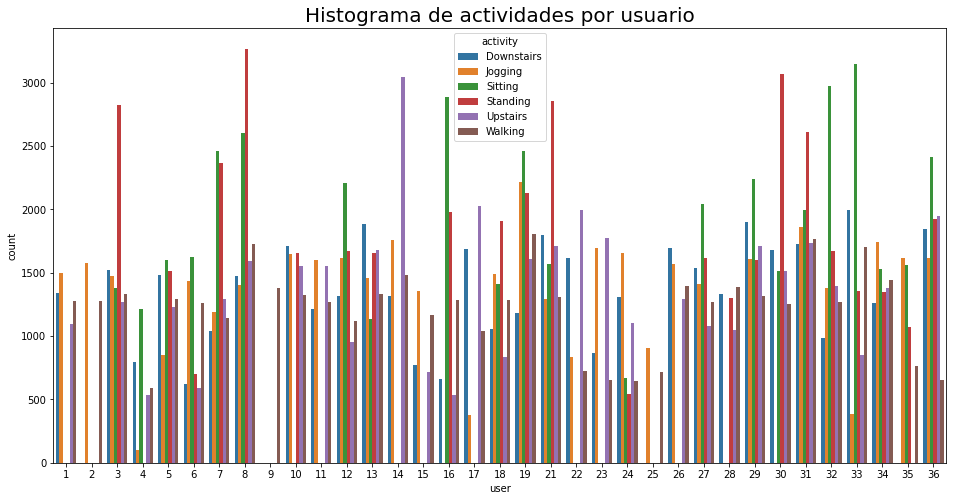

In [23]:
plt.figure(figsize=(16,8))
plt.title('Histograma de actividades por usuario', fontsize=20)
sns.countplot(x='user',hue='activity', data = datafinal)
plt.show()


este otro histograma se clasifica por actividades identificando mas claro las cantidades,donde el valor minimo es de 48032 que es de Stading y el valor maximo es de un 422301 de walking por lo que es entre 8 o 9 veces que Standing



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


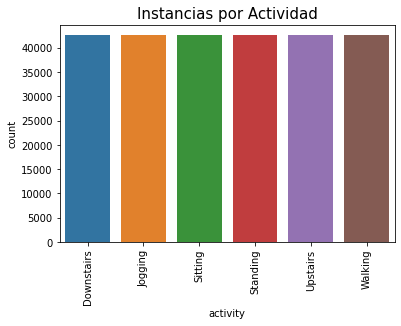

In [24]:
plt.title('Instancias por Actividad', fontsize=15)
sns.countplot(datafinal.activity)
plt.xticks(rotation=90)
plt.show()

In [25]:
datafinal.activity.value_counts()

Downstairs    42643
Jogging       42643
Sitting       42643
Standing      42643
Upstairs      42643
Walking       42643
Name: activity, dtype: int64

en los siguientes 3 histogramas de frecuencia se graficaron las columnas de las aceleraciones en x,y,z y lo que nos dio fue que
para x los valores que se destacan es entre el -5 y 5
para y los valores de la grafica se destacael intervalo 5 y 10
para z los valores de la grafica se destaca el nitervalo -5 -y 5

(array([ 3977.,  3414.,  9232., 33714., 73721., 63570., 42457., 17523.,
         4706.,  3544.]),
 array([-3.34260635, -2.69000332, -2.03740029, -1.38479726, -0.73219423,
        -0.07959121,  0.57301182,  1.22561485,  1.87821788,  2.53082091,
         3.18342394]),
 <a list of 10 Patch objects>)

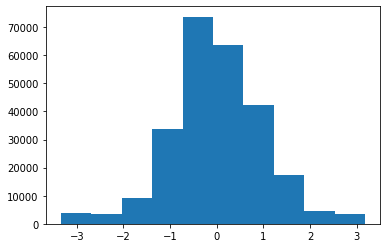

In [26]:
plt.hist(datafinal.x)

(array([  965.,   870.,  2057.,  5144., 31239., 38092., 53436., 83538.,
        24707., 15810.]),
 array([-4.35166093, -3.69919665, -3.04673236, -2.39426808, -1.74180379,
        -1.08933951, -0.43687522,  0.21558906,  0.86805335,  1.52051763,
         2.17298192]),
 <a list of 10 Patch objects>)

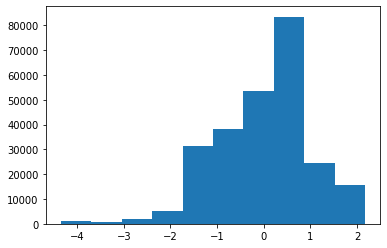

In [27]:
plt.hist(datafinal.y)

(array([  376.,  1349.,  4425., 18889., 82595., 87368., 33966., 24381.,
         1973.,   536.]),
 array([-4.59174386, -3.72385863, -2.85597341, -1.98808818, -1.12020296,
        -0.25231774,  0.61556749,  1.48345271,  2.35133794,  3.21922316,
         4.08710839]),
 <a list of 10 Patch objects>)

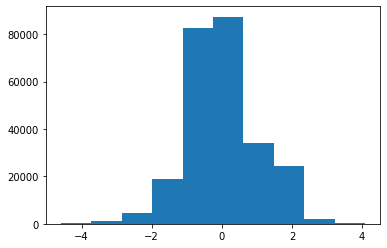

In [28]:
plt.hist(datafinal.z)

otro histograma nos muestra la distribucion de datos lineal, y los datos que se pueden destacar es la de standing en la que se concentra entorno al intervalo 6 y 10, y no tiene presencia en en intervalo 10 y 20 , y -10  y 0 

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplo

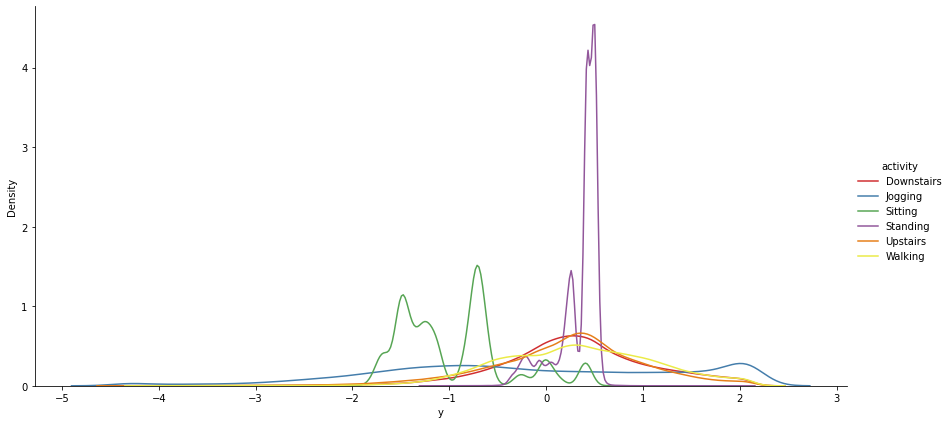

In [29]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(datafinal, hue='activity', size=6,aspect=2)
facetgrid.map(sns.distplot,'y', hist=False)\
    .add_legend()
plt.show()

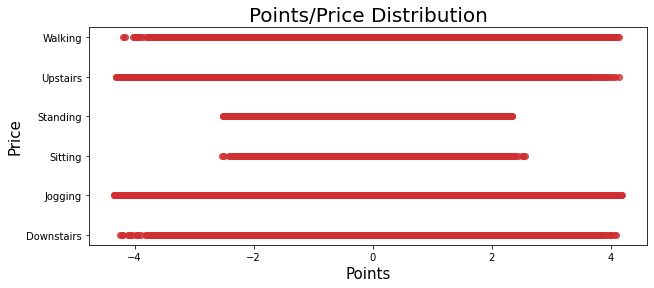

In [30]:
#Algunos valores atípicos a tener en cuenta
plt.figure(figsize=(10,4))

g = sns.regplot(x='x', y='activity', data=datafinal, x_jitter=True, fit_reg=False)
g.set_title("Points/Price Distribution", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price", fontsize= 15)

plt.show()

diagrama de caja entorno al acelerometro y por lo que podemos concluir que:
si el acelerometro de x,y,z de standing, como se ha visto en otros histogramas, posee un intervalo reducido por lo que puede provocar problemas de eficacia 


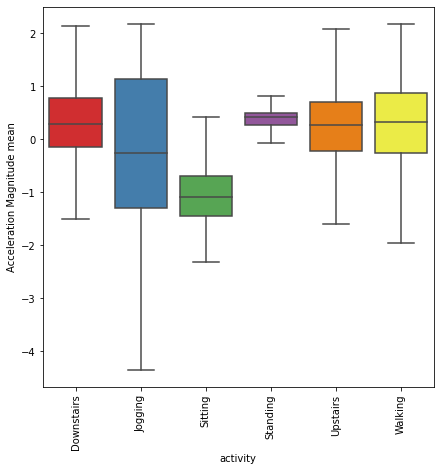

In [31]:
plt.figure(figsize=(7,7))
sns.boxplot(x='activity', y='y',data=datafinal, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.xticks(rotation=90)
plt.show()

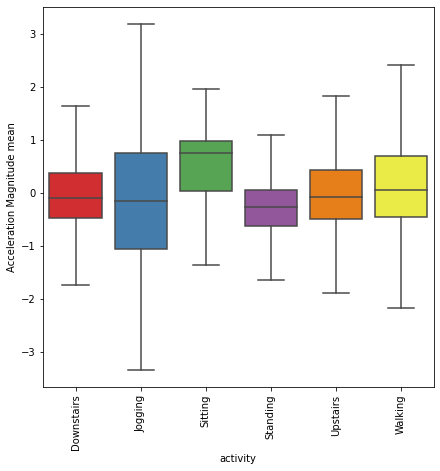

In [32]:
plt.figure(figsize=(7,7))
sns.boxplot(x='activity', y='x',data=datafinal, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.xticks(rotation=90)
plt.show()

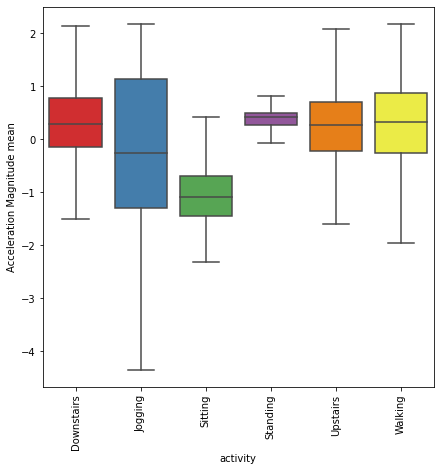

In [33]:
plt.figure(figsize=(7,7))
sns.boxplot(x='activity', y='y',data=datafinal, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.xticks(rotation=90)
plt.show()


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Indexed 255858 samples in 0.431s...
[t-SNE] Computed neighbors for 255858 samples in 4.007s...
[t-SNE] Computed conditional probabilities for sample 1000 / 255858
[t-SNE] Computed conditional probabilities for sample 2000 / 255858
[t-SNE] Computed conditional probabilities for sample 3000 / 255858
[t-SNE] Computed conditional probabilities for sample 4000 / 255858
[t-SNE] Computed conditional probabilities for sample 5000 / 255858
[t-SNE] Computed conditional probabilities for sample 6000 / 255858
[t-SNE] Computed conditional probabilities for sample 7000 / 255858
[t-SNE] Computed conditional probabilities for sample 8000 / 255858
[t-SNE] Computed conditional probabilities for sample 9000 / 255858
[t-SNE] Computed conditional probabilities for sample 10000 / 255858
[t-SNE] Computed conditional probabilities for sample 11000 / 255858
[t-SNE] Computed conditional probabilities for sample 12000 / 255858
[t-SNE] Computed conditional probabilities for sample 13000 / 255858
[t-SNE] C

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


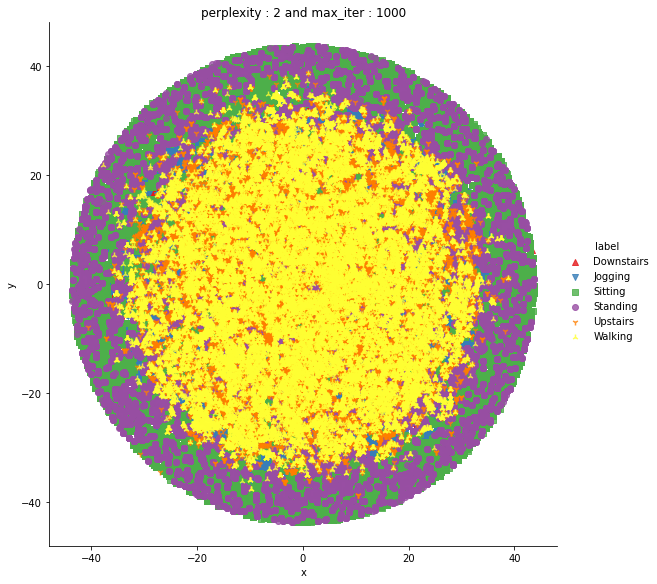

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 255858 samples in 0.325s...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 255858 samples in 4.183s...
[t-SNE] Computed conditional probabilities for sample 1000 / 255858
[t-SNE] Computed conditional probabilities for sample 2000 / 255858
[t-SNE] Computed conditional probabilities for sample 3000 / 255858
[t-SNE] Computed conditional probabilities for sample 4000 / 255858
[t-SNE] Computed conditional probabilities for sample 5000 / 255858
[t-SNE] Computed conditional probabilities for sample 6000 / 255858
[t-SNE] Computed conditional probabilities for sample 7000 / 255858
[t-SNE] Computed conditional probabilities for sample 8000 / 255858
[t-SNE] Computed conditional probabilities for sample 9000 / 255858
[t-SNE] Computed conditional probabilities for sample 10000 / 255858
[t-SNE] Computed conditional probabilities for sample 11000 / 255858
[t-SNE] Computed conditional probabilities for sample 12000 / 255858
[t-SNE] Computed conditional probabilities for sample 13000 / 255858
[t-SNE] Computed conditional probabilities for sample

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


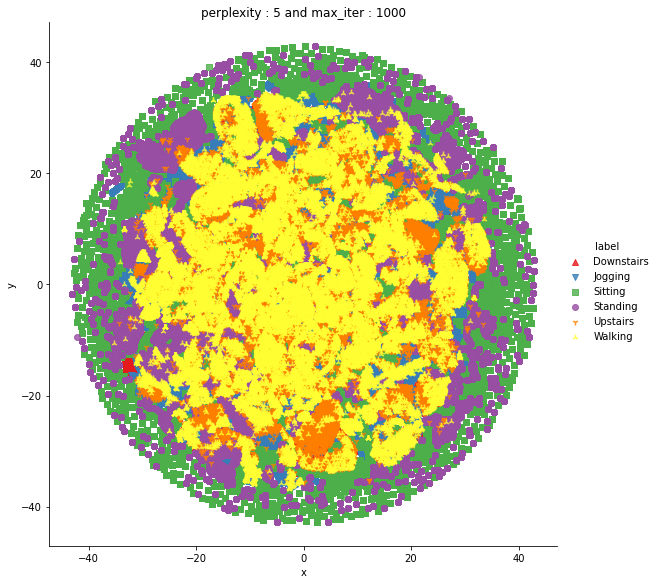

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Indexed 255858 samples in 0.313s...
[t-SNE] Computed neighbors for 255858 samples in 5.976s...
[t-SNE] Computed conditional probabilities for sample 1000 / 255858
[t-SNE] Computed conditional probabilities for sample 2000 / 255858
[t-SNE] Computed conditional probabilities for sample 3000 / 255858
[t-SNE] Computed conditional probabilities for sample 4000 / 255858
[t-SNE] Computed conditional probabilities for sample 5000 / 255858
[t-SNE] Computed conditional probabilities for sample 6000 / 255858
[t-SNE] Computed conditional probabilities for sample 7000 / 255858
[t-SNE] Computed conditional probabilities for sample 8000 / 255858
[t-SNE] Computed conditional probabilities for sample 9000 / 255858
[t-SNE] Computed conditional probabilities for sample 10000 / 255858
[t-SNE] Computed conditional probabilities for sample 11000 / 255858
[t-SNE] Computed conditional probabilities for sample 12000 / 255858
[t-SNE] Computed conditional probabilities for sample 13000 / 255858
[t-SNE] C

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


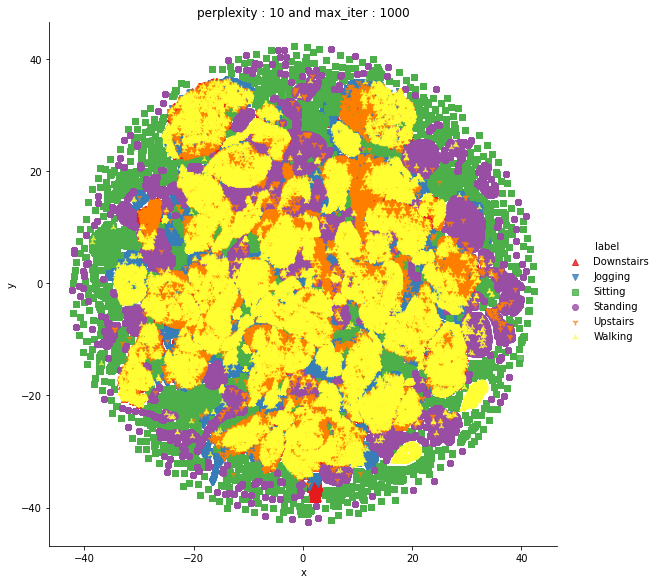

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Indexed 255858 samples in 0.307s...
[t-SNE] Computed neighbors for 255858 samples in 8.949s...
[t-SNE] Computed conditional probabilities for sample 1000 / 255858
[t-SNE] Computed conditional probabilities for sample 2000 / 255858
[t-SNE] Computed conditional probabilities for sample 3000 / 255858
[t-SNE] Computed conditional probabilities for sample 4000 / 255858
[t-SNE] Computed conditional probabilities for sample 5000 / 255858
[t-SNE] Computed conditional probabilities for sample 6000 / 255858
[t-SNE] Computed conditional probabilities for sample 7000 / 255858
[t-SNE] Computed conditional probabilities for sample 8000 / 255858
[t-SNE] Computed conditional probabilities for sample 9000 / 255858
[t-SNE] Computed conditional probabilities for sample 10000 / 255858
[t-SNE] Computed conditional probabilities for sample 11000 / 255858
[t-SNE] Computed conditional probabilities for sample 12000 / 255858
[t-SNE] Computed conditional probabilities for sample 13000 / 255858
[t-SNE] C

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


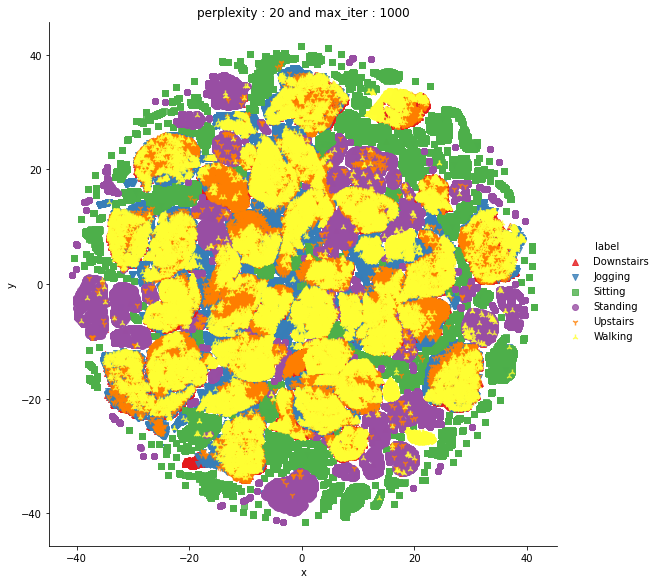

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Indexed 255858 samples in 0.324s...
[t-SNE] Computed neighbors for 255858 samples in 20.521s...
[t-SNE] Computed conditional probabilities for sample 1000 / 255858
[t-SNE] Computed conditional probabilities for sample 2000 / 255858
[t-SNE] Computed conditional probabilities for sample 3000 / 255858
[t-SNE] Computed conditional probabilities for sample 4000 / 255858
[t-SNE] Computed conditional probabilities for sample 5000 / 255858
[t-SNE] Computed conditional probabilities for sample 6000 / 255858
[t-SNE] Computed conditional probabilities for sample 7000 / 255858
[t-SNE] Computed conditional probabilities for sample 8000 / 255858
[t-SNE] Computed conditional probabilities for sample 9000 / 255858
[t-SNE] Computed conditional probabilities for sample 10000 / 255858
[t-SNE] Computed conditional probabilities for sample 11000 / 255858
[t-SNE] Computed conditional probabilities for sample 12000 / 255858
[t-SNE] Computed conditional probabilities for sample 13000 / 255858
[t-SNE] 

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


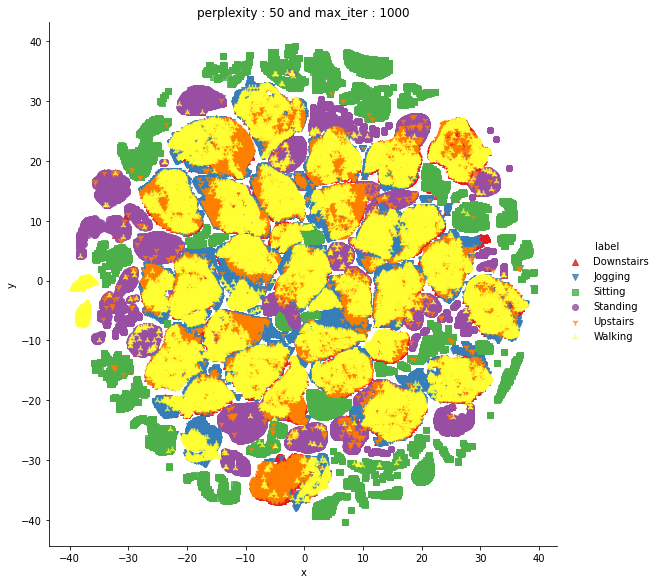

Done


In [36]:
from sklearn.manifold import TSNE

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # realizar t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity, n_jobs=-1).fit_transform(X_data)
        print('Done..')
        
        # preparar los datos para seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # dibujar la trama en el lugar apropiado en la cuadrícula
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')

X_pre_tsne = datafinal.drop(["activity"], axis=1)
y_pre_tsne = datafinal["activity"]

perform_tsne(X_data=X_pre_tsne, y_data=y_pre_tsne, perplexities=[2,5,10,20,50])

# Entrega 04 - Model

en la etapa de modelo se construira 3 modelos que son: SVM (suport vector machine),random  forest y por ultimo el XG Boost (extreme gradient boosting) todos ellos utilizados para clasificacion y regresion

In [496]:
from sklearn.svm import SVC #utilizar SVM
from sklearn import metrics #para comprobar la precisión del modelo
from sklearn.metrics import classification_report, confusion_matrix, precision_score,roc_auc_score
from sklearn.model_selection import train_test_split #dividir en conjunto de entrenamiento y prueba.
from sklearn.ensemble import RandomForestClassifier #utilizar Random Forest
from sklearn import datasets #importar conjunto de datos
import xgboost as xgb #utilizar xgboost

aqui vemos un resumen de los datos que manejaremos

In [497]:
#datafinal = datafinal.drop(['time'], axis=1)
datafinal = datafinal.drop(['user'], axis=1)
datafinal.head()

,activity,x,y,z
0,Downstairs,-1.473267,0.425836,0.063039
1,Downstairs,0.092950,0.179452,-0.589604
2,Downstairs,-1.292676,1.424516,-0.242265
3,Downstairs,-1.479834,0.002054,-1.124993
4,Downstairs,-0.535835,-0.595839,-0.301999


SVM

empezaremos con el suport vector machine

separamos los datos esperados con los datos por analizar

In [498]:
x_svm=datafinal.iloc[:,1:4]
x_svm

,x,y,z
0,-1.473267,0.425836,0.063039
1,0.092950,0.179452,-0.589604
2,-1.292676,1.424516,-0.242265
3,-1.479834,0.002054,-1.124993
4,-0.535835,-0.595839,-0.301999
...,...,...,...
255853,0.539503,1.099288,-1.040923
255854,1.243808,0.897253,-0.260154
255855,1.449025,-0.098142,-0.310848
255856,0.526070,0.261743,-0.284261


In [499]:
y_svm=datafinal.iloc[:,0]
y_svm

0         Downstairs
1         Downstairs
2         Downstairs
3         Downstairs
4         Downstairs
             ...    
255853       Walking
255854       Walking
255855       Walking
255856       Walking
255857       Walking
Name: activity, Length: 255858, dtype: object

se empieza a dividir entre los datos de test y de train

In [500]:
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x_svm, y_svm, test_size=0.30)

In [501]:
print("Tamaño de los datos de train: ", len(x_train_svm))
print("Tamaño de los datos de test: ", len(x_test_svm))

Tamaño de los datos de train:  179100
Tamaño de los datos de test:  76758


In [502]:
print(x_train_svm.shape)
print(y_train_svm.shape)
print(x_test_svm.shape)
print(y_test_svm.shape)

(179100, 3)
(179100,)
(76758, 3)
(76758,)


In [503]:
from sklearn.metrics import f1_score


aplicamos el modelo a probar

In [504]:
model = SVC()
#Recomendación: Revisar los parámetros del clasificador https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?highlight=svm
model.fit(x_train_svm, y_train_svm)

SVC()

ocupamos los datos de prueba, que estos no se ocuparon para el entrenamiento

In [505]:
pred_svm = model.predict(x_test_svm)
#pred_svm_test = model.predict(x_train_svm)

In [506]:
#train_f1 = f1_score(pred_svm, y_train_svm)
#test_f1 = f1_score(pred_svm_test, y_test_svm)

hacemos un resumen de los resultados del modelo implementado en base a una matriz de confucion y la precision del modelo en base a los datos

In [507]:
print(classification_report(y_test_svm, pred_svm))
cm = confusion_matrix(y_test_svm, pred_svm)
print(cm)
acc_svm = metrics.accuracy_score(pred_svm, y_test_svm)
print('The accuracy of the SVM is:', acc_svm)

              precision    recall  f1-score   support

  Downstairs       0.40      0.32      0.36     12668
     Jogging       0.59      0.66      0.62     12747
     Sitting       0.93      1.00      0.96     12900
    Standing       0.66      0.99      0.79     12812
    Upstairs       0.37      0.11      0.17     12756
     Walking       0.38      0.46      0.42     12875

    accuracy                           0.59     76758
   macro avg       0.55      0.59      0.55     76758
weighted avg       0.56      0.59      0.55     76758

[[ 4067  1827   227  2118  1029  3400]
 [ 1103  8394   320   287   438  2205]
 [    1    12 12862    17     0     8]
 [   48     3    70 12630    23    38]
 [ 2495  2068   196  2622  1440  3935]
 [ 2393  1823   202  1572   979  5906]]
The accuracy of the SVM is: 0.5901534693452148


el resultado que nos dio fue de un 59% de acierto

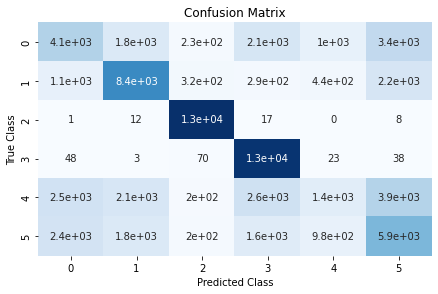

In [508]:
sns.heatmap(cm, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()


ahora  vamos a aplicar el modelo de random forest

dividimos los datos resultantes con los datos a analizar

In [509]:
X_rf = datafinal.iloc[:, 1:4]
X_rf

,x,y,z
0,-1.473267,0.425836,0.063039
1,0.092950,0.179452,-0.589604
2,-1.292676,1.424516,-0.242265
3,-1.479834,0.002054,-1.124993
4,-0.535835,-0.595839,-0.301999
...,...,...,...
255853,0.539503,1.099288,-1.040923
255854,1.243808,0.897253,-0.260154
255855,1.449025,-0.098142,-0.310848
255856,0.526070,0.261743,-0.284261


In [510]:
y_rf = datafinal.iloc[:, 0]
y_rf

0         Downstairs
1         Downstairs
2         Downstairs
3         Downstairs
4         Downstairs
             ...    
255853       Walking
255854       Walking
255855       Walking
255856       Walking
255857       Walking
Name: activity, Length: 255858, dtype: object

se divide un 30% para los datos de prueba y el resto para el entrenamiento

In [511]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf ,test_size = 0.3)

In [512]:
print("Size of training data: ", len(X_train_rf))
print("Size of test data: ", len(X_test_rf))

Size of training data:  179100
Size of test data:  76758


In [513]:
print(X_train_rf.shape)
print(y_train_rf.shape)
print(X_test_rf.shape)
print(y_test_rf.shape)

(179100, 3)
(179100,)
(76758, 3)
(76758,)


se aplica el modelo de random forest

In [514]:
classifier = RandomForestClassifier()
#Recomendación: Revisar los parámetros del clasificador https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

classifier.fit(X_train_rf, y_train_rf)

RandomForestClassifier()

se pone a prueba intentando predecir con los datos de prueba separado previamente

In [515]:
#Predicción de los resultados del conjunto de pruebas
y_pred_rf = classifier.predict(X_test_rf)

In [516]:
#Hacer la matriz de confusión
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)
cm_rf

array([[ 4519,  1947,    29,   499,  2781,  3013],
       [ 1435,  8114,    52,    65,  1321,  1751],
       [    5,    34, 12713,    19,     6,     7],
       [  243,    19,    15, 12039,   317,   142],
       [ 3109,  2035,    22,   607,  3981,  3093],
       [ 2942,  1906,    27,   296,  2668,  4987]])

In [517]:
print(classification_report(y_test_rf, y_pred_rf))

              precision    recall  f1-score   support

  Downstairs       0.37      0.35      0.36     12788
     Jogging       0.58      0.64      0.61     12738
     Sitting       0.99      0.99      0.99     12784
    Standing       0.89      0.94      0.92     12775
    Upstairs       0.36      0.31      0.33     12847
     Walking       0.38      0.39      0.39     12826

    accuracy                           0.60     76758
   macro avg       0.59      0.60      0.60     76758
weighted avg       0.59      0.60      0.60     76758



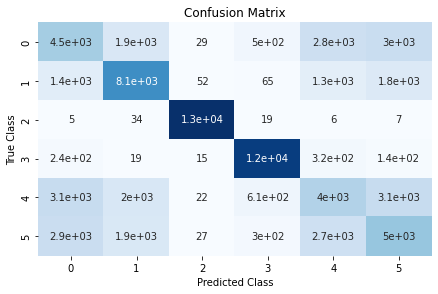

In [518]:
sns.heatmap(cm_rf, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [519]:
print('The accuracy of the Random forest is:',metrics.accuracy_score(y_pred_rf, y_test_rf))

The accuracy of the Random forest is: 0.6038849370749628


lo que nos dio una precision de un 60%


ahora  aplicar XGBoost

aca no nos sirve dividirlo como en las anteriores 2 (iloc) sino que hay que convertirlo en un formato de arreglos de tipo numpy

In [520]:


datafinal['activity'] = LabelEncoder().fit_transform(datafinal['activity'])
y_boost = datafinal['activity'].to_numpy()
y_boost

array([0, 0, 0, ..., 5, 5, 5])

In [521]:
x_boost = datafinal[['x','y','z']].to_numpy()
x_boost

array([[-1.47326694,  0.42583641,  0.06303911],
       [ 0.09295028,  0.17945155, -0.58960406],
       [-1.29267585,  1.42451638, -0.24226515],
       ...,
       [ 1.44902515, -0.09814206, -0.310848  ],
       [ 0.52606989,  0.26174327, -0.28426082],
       [-0.09092428,  0.80362653,  0.40816567]])

se hace el mismo procedimiento de dividir entre prueba y enttrenamiento

In [522]:
X_train_boost, X_test_boost, y_train_boost, y_test_boost = train_test_split(x_boost, y_boost, test_size=0.3)

In [523]:
print("Tamaño del dato de entrenamiento:",len(X_train_boost));
print("Tamaño de los datos de prueba:",len(X_test_boost));

Tamaño del dato de entrenamiento: 179100
Tamaño de los datos de prueba: 76758


creacion de DMatrix 

In [524]:

#Creación del formato de datos Xgboost DMatrix (a partir de los arreglos ya obtenidos)
d_boosttrain = xgb.DMatrix(X_train_boost, label=y_train_boost)
d_boosttest = xgb.DMatrix(X_test_boost, label=y_test_boost)

estos son los parametros que trabajara en el entrenamiento

In [525]:
parameters = {'eta': 0.3, 'objective': 'multi:softprob', 'num_class': 6, 'max_depth': 4}
num_round = 20

aca entramos en entrenar el modelo  

In [526]:
#Entrenar el modelo
bst = xgb.train(parameters, d_boosttrain, num_round)

despues del entrenamiento del modelo predecimos las etiquetas de los datos de prueba

In [527]:

#predicción
preds = bst.predict(d_boosttest)

In [528]:
preds[:5]

array([[0.03639679, 0.73606277, 0.00426689, 0.00423032, 0.1608677 ,
        0.05817549],
       [0.1190166 , 0.6276254 , 0.02397744, 0.01766969, 0.17517763,
        0.0365332 ],
       [0.22792998, 0.12061574, 0.00621144, 0.02232423, 0.18114235,
        0.44177625],
       [0.06152305, 0.01991611, 0.00344865, 0.78470844, 0.07236942,
        0.05803435],
       [0.00669962, 0.01835833, 0.95863134, 0.00207665, 0.00591126,
        0.00832276]], dtype=float32)

In [529]:
best_preds = np.asarray([np.argmax(line) for line in preds])

In [530]:

best_preds

array([1, 1, 5, ..., 2, 3, 5])

aca se hace un resumen con una matriz de confusion

In [531]:
#Hacer la matriz de confusión
m = confusion_matrix(y_test_boost, best_preds)
m

array([[ 4137,  1802,   241,  1556,  1367,  3661],
       [ 1018,  8263,   450,   247,   515,  2396],
       [    0,    68, 12595,    57,     2,    14],
       [   65,     1,    17, 12236,   152,   383],
       [ 2676,  2082,   161,  1876,  1927,  4094],
       [ 2389,  1868,   166,  1163,  1336,  5777]])

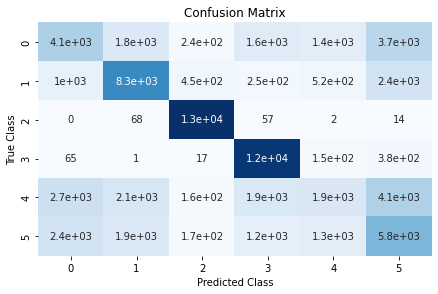

In [532]:
sns.heatmap(m, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

y calculando el  puntaje de precision de modelo recien entrenado

In [533]:

#calculando la precisión 

print(precision_score(y_test_boost, best_preds, average='macro'))

0.5574361426416061


y que nos dio un 56%